In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/prices-split-adjusted.csv
/kaggle/input/prices.csv
/kaggle/input/securities.csv
/kaggle/input/fundamentals.csv


In [2]:
company_info = pd.read_csv('../input/securities.csv')
company_info.head()
company_info["Ticker symbol"].nunique()
company_info.loc[company_info.Security.str.startswith('Face') , :]
df =  pd.read_csv('../input/prices.csv', header=0)
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [6]:
company_data = company_info.loc[(company_info["Security"] == 'Xerox Corp.') | (company_info["Security"] == 'Yahoo Inc.') | (company_info["Security"] == 'Adobe Systems Inc')
               | (company_info["Security"] == 'Adobe Systems Inc') 
              | (company_info["Security"] == 'Facebook') | (company_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 

In [11]:
def closing_data(code):
    global closing_stock
    plt.subplot(211)
    company_close = df[df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.plot(company_close , 'r')
    plt.show()

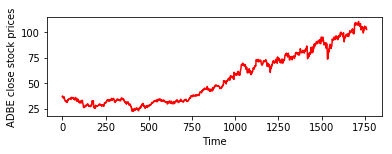

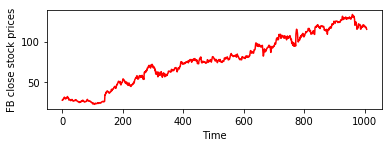

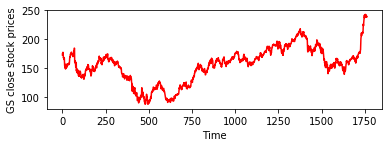

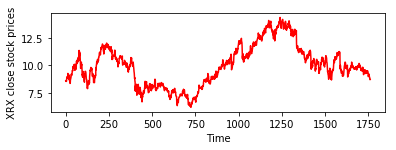

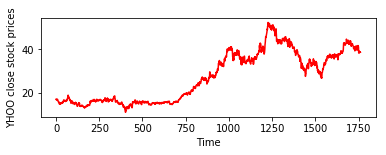

In [12]:
for i in company_data:
    closing_data(i)

In [13]:
stocks = closing_stock[: , 0]
print(stocks)
stocks = stocks.reshape(len(stocks) , 1)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
stocks = scaler.fit_transform(stocks)



[17.1  17.23 17.17 ... 38.73 38.64 38.67]


In [14]:
import numpy as np 
train, test= np.split(stocks, [int(.8 *len(stocks))])
print(train , test)
train = stocks[0:train]
print(train)
test = stocks[len(train) : ]
train = train.reshape(len(train) , 1)
test = test.reshape(len(test) , 1)
print(train.shape , test.shape)

[[0.14559111]
 [0.14874032]
 [0.14728683]
 ...
 [0.63372093]
 [0.6145833 ]
 [0.6196705 ]] [[0.6312985 ]
 [0.6041666 ]
 [0.5668605 ]
 [0.60174423]
 [0.60925394]
 [0.6058624 ]
 [0.5959302 ]
 [0.58381784]
 [0.55741274]
 [0.5290698 ]
 [0.4898256 ]
 [0.50024223]
 [0.5191376 ]
 [0.5474806 ]
 [0.534157  ]
 [0.51235473]
 [0.4968508 ]
 [0.500969  ]
 [0.51962215]
 [0.49636632]
 [0.47989345]
 [0.4949128 ]
 [0.48594964]
 [0.49273258]
 [0.46584302]
 [0.48328495]
 [0.49200583]
 [0.4806202 ]
 [0.47601748]
 [0.4864341 ]
 [0.467781  ]
 [0.45179266]
 [0.44210273]
 [0.43701547]
 [0.39995158]
 [0.41593993]
 [0.43168604]
 [0.43168604]
 [0.47529072]
 [0.47868222]
 [0.4813469 ]
 [0.5033915 ]
 [0.5155039 ]
 [0.5191376 ]
 [0.5273741 ]
 [0.5147771 ]
 [0.50872093]
 [0.54239345]
 [0.5397287 ]
 [0.5428779 ]
 [0.5266473 ]
 [0.48522294]
 [0.49854654]
 [0.5348837 ]
 [0.54045546]
 [0.56225777]
 [0.58381784]
 [0.58042634]
 [0.59423447]
 [0.5857558 ]
 [0.5724322 ]
 [0.58091086]
 [0.5821221 ]
 [0.5598353 ]
 [0.5472384 ]


TypeError: only integer scalar arrays can be converted to a scalar index

In [15]:
def preprocessing(data , days=2):
    X, Y = [], []
    for i in range(len(data)-days-1):
        a = data[i:(i+days), 0]
        X.append(a)
        Y.append(data[i + days, 0])
    return np.array(X), np.array(Y)

In [16]:
X_train, y_train = preprocessing(train, 2)
X_test, y_test = preprocessing(test, 2)

In [17]:
X_train = X_train.reshape(X_train.shape[0] , 1 ,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0] , 1 ,X_test.shape[1])

In [19]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout , Activation
from keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
days =2
model = Sequential()
model.add(GRU(256 , input_shape = (1 , days) , return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1, 256)            198912    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 740,737
Trainable params: 740,737
Non-trainable params: 0
_________________________________________________________________
None

In [20]:
optimizer = optimizers.Adam(lr=0.001)
from keras.callbacks import ReduceLROnPlateau
model.compile(loss='mean_squared_error', optimizer=optimizer , metrics = ['mean_squared_error'])
history = model.fit(X_train, y_train, epochs=100 , batch_size = 128 , 
           validation_data = (X_test,y_test))



Train on 1406 samples, validate on 350 samples
Epoch 1/100
1406/1406 [==============================] - 3s 2ms/step - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 2/100
1406/1406 [==============================] - 0s 276us/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 3/100
1406/1406 [==============================] - 0s 270us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 4/100
1406/1406 [==============================] - 0s 272us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 3.4565e-04 - val_mean_squared_error: 3.4565e-04
Epoch 5/100
1406/1406 [==============================] - 0s 274us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 3.8519e-04 - val_mean_squared_error: 3.8519e-04
Epoch 6/100
1406/1406 [==============================] - 0s 304us/step - loss: 0.0018 - mean_squared_err

Epoch 47/100
1406/1406 [==============================] - 0s 270us/step - loss: 8.4402e-04 - mean_squared_error: 8.4402e-04 - val_loss: 3.7215e-04 - val_mean_squared_error: 3.7215e-04
Epoch 48/100
1406/1406 [==============================] - 0s 267us/step - loss: 8.6381e-04 - mean_squared_error: 8.6381e-04 - val_loss: 3.4758e-04 - val_mean_squared_error: 3.4758e-04
Epoch 49/100
1406/1406 [==============================] - 0s 270us/step - loss: 8.8802e-04 - mean_squared_error: 8.8802e-04 - val_loss: 3.1209e-04 - val_mean_squared_error: 3.1209e-04
Epoch 50/100
1406/1406 [==============================] - 0s 272us/step - loss: 7.9355e-04 - mean_squared_error: 7.9355e-04 - val_loss: 4.4525e-04 - val_mean_squared_error: 4.4525e-04
Epoch 51/100
1406/1406 [==============================] - 0s 273us/step - loss: 9.0287e-04 - mean_squared_error: 9.0287e-04 - val_loss: 4.0961e-04 - val_mean_squared_error: 4.0961e-04
Epoch 52/100
1406/1406 [==============================] - 0s 278us/step - loss: 

1406/1406 [==============================] - 0s 271us/step - loss: 6.4220e-04 - mean_squared_error: 6.4220e-04 - val_loss: 3.1568e-04 - val_mean_squared_error: 3.1568e-04
Epoch 92/100
1406/1406 [==============================] - 0s 265us/step - loss: 6.4573e-04 - mean_squared_error: 6.4573e-04 - val_loss: 3.9920e-04 - val_mean_squared_error: 3.9920e-04
Epoch 93/100
1406/1406 [==============================] - 0s 272us/step - loss: 6.4164e-04 - mean_squared_error: 6.4164e-04 - val_loss: 3.0582e-04 - val_mean_squared_error: 3.0582e-04
Epoch 94/100
1406/1406 [==============================] - 0s 269us/step - loss: 6.2385e-04 - mean_squared_error: 6.2385e-04 - val_loss: 3.6791e-04 - val_mean_squared_error: 3.6791e-04
Epoch 95/100
1406/1406 [==============================] - 0s 283us/step - loss: 6.5681e-04 - mean_squared_error: 6.5681e-04 - val_loss: 3.8130e-04 - val_mean_squared_error: 3.8130e-04
Epoch 96/100
1406/1406 [==============================] - 0s 268us/step - loss: 6.1553e-04 - 

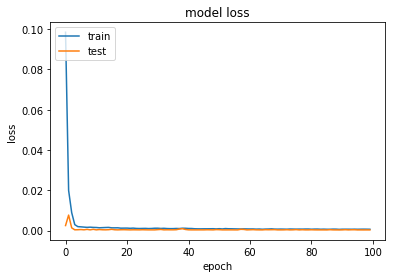

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
import math
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, X_train, y_train , X_test, y_test)

Train Score: 0.00019 MSE (0.01 RMSE)
Test Score: 0.00029 MSE (0.02 RMSE)


(0.0001914831574343524, 0.00029353316973096557)

Red - Predicted,  Blue - Actual


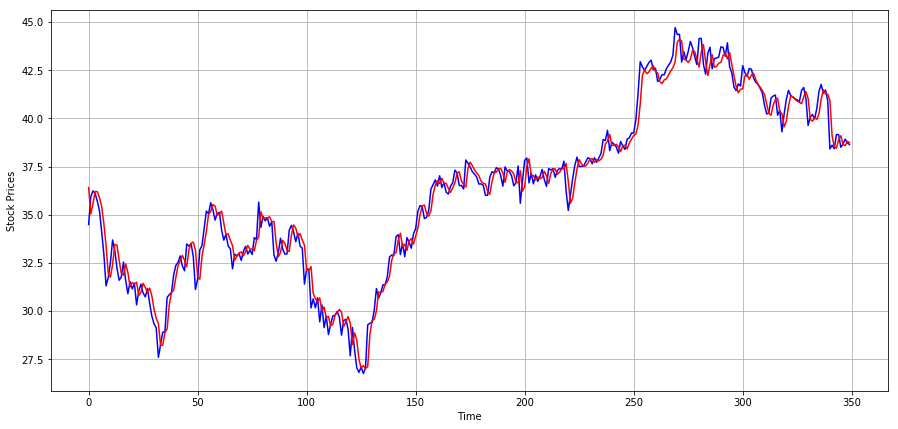

In [24]:
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)
pred[:10]
y_test = y_test.reshape(y_test.shape[0] , 1)
y_test = scaler.inverse_transform(y_test)
y_test[:10]
print("Red - Predicted,  Blue - Actual")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(y_test , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.grid(True)
plt.show()

In [ ]:
stocks.shape

from keras.models import load_model
 
model.save('lstm_model.h5')

In [25]:
from sklearn.preprocessing import MinMaxScaler
def preprocess(closing_stocks):
    stocks_1 = closing_stocks[: , 0]
    stocks_1 = stocks_1.reshape(len(stocks) , 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    stocks_1 = scaler.fit_transform(stocks_1)
    x, y = arrange(stocks_1)
    x = x.reshape(x.shape[0] , 1 ,x.shape[1])
    return x,y

In [26]:
def prediction(x,y):
    from matplotlib import pyplot as plt
    y_pred = model.predict(x)
    plt.rcParams["figure.figsize"] = (15,7)
    plt.figure()
    plt.plot(y , 'b')
    plt.plot(y_pred , 'r')
    plt.title('Prediction vs Real Stock Price')
    plt.ylabel('Price')
    plt.xlabel('Days')
    plt.legend(['Prediction', 'Real'], loc='upper left')
    plt.show()

    

In [36]:
def stock_prediction(code):
    company_close = df[df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    stocks = closing_stock[: , 0]
    stocks = stocks.reshape(len(stocks) , 1)
    stocks = scaler.fit_transform(stocks)
    X,Y = preprocessing(stocks,2)
    X = X.reshape(X.shape[0] , 1 ,X.shape[1])
    prediction(X,Y)

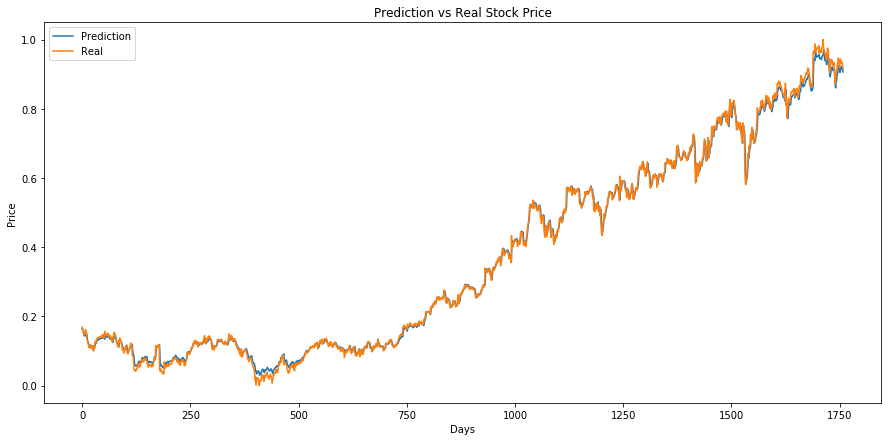

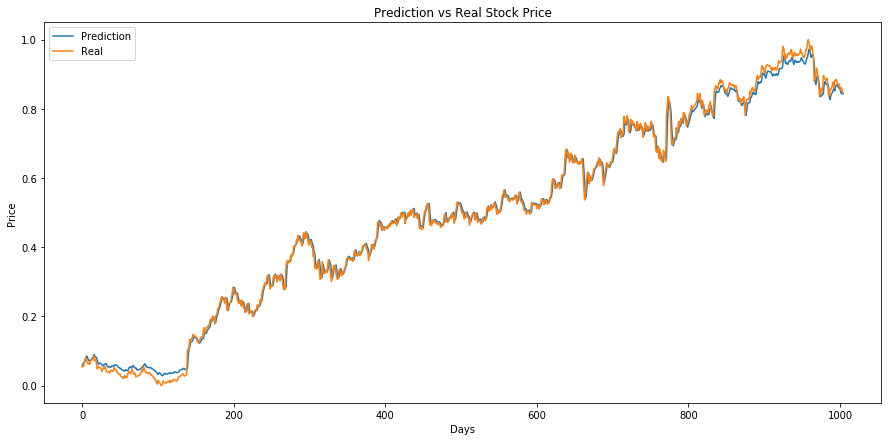

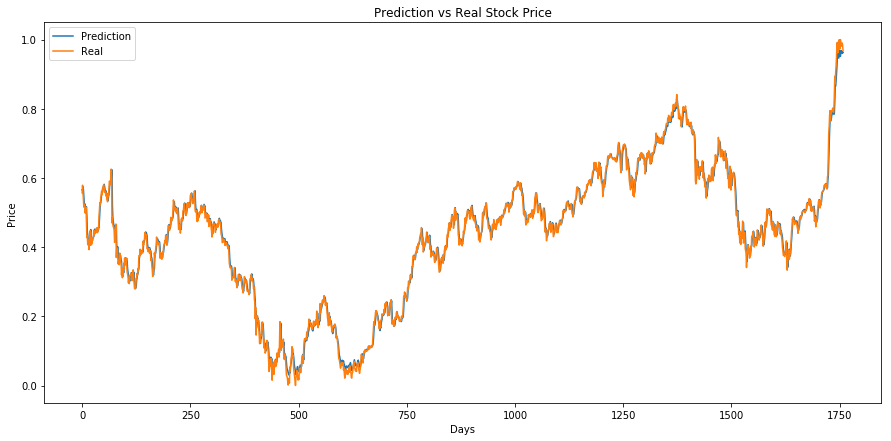

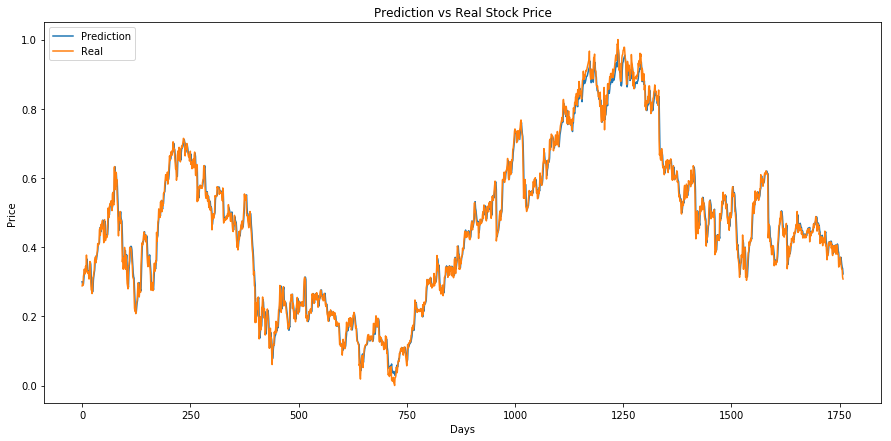

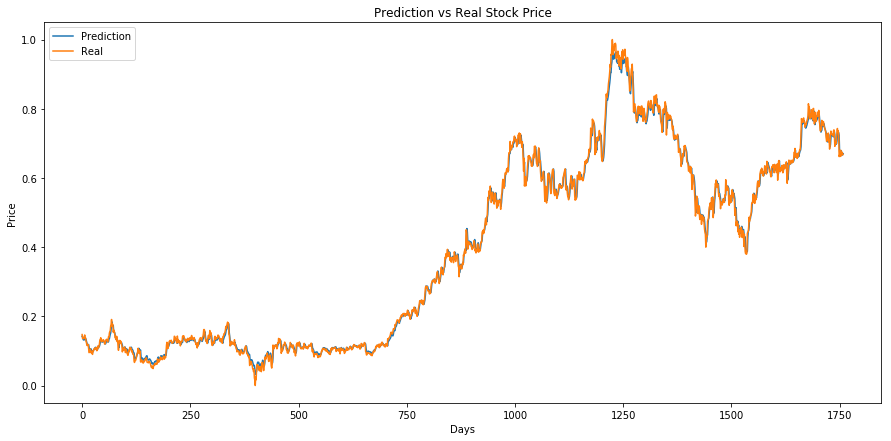

In [37]:
for i in company_data:
    stock_prediction(i)